### Monte Carlo Simulation with GBM of Total Recycled Plastic Waste

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import statistics

##### SImulating Demand with Geometric Brownian Motion

### $$ dS_t  = \mu S_tdt + \sigma S_tdW_t $$

Integrated Form:

### $$ S_t  = S_0e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t} $$

In [414]:
# Parameters
# drift coefficent
mu = 0.06412
# number of steps
n = 5
# time in years
T = 5
# number of sims
M = 10000
# initial demand
S0 = 10000
# volatility
sigma = 0.010823

dt = T/n

In [415]:
np.random.seed(1234)
# calc each time step
dt = T/n
# simulation using numpy arrays
demand = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
demand = np.vstack([np.ones(M), demand])
# multiply through by S0 and return the cumulative product of elements along a given simulation path axis=0. 
demand_trend = 1 * demand.cumprod(axis=0)
demand = S0 * demand.cumprod(axis=0)

In [433]:
#pop_trend = (np.ones(T+1) * 0.158879).cumsum() - 0.158879 + S0
#prod_trend = ((np.ones(n+1) * 1.0221045).cumprod()) * S0

production_cap = [10000, 10511.401946, 11141.796653, 11826.509148, 12563.455807, 13354.036651]

<function matplotlib.pyplot.show(close=None, block=None)>

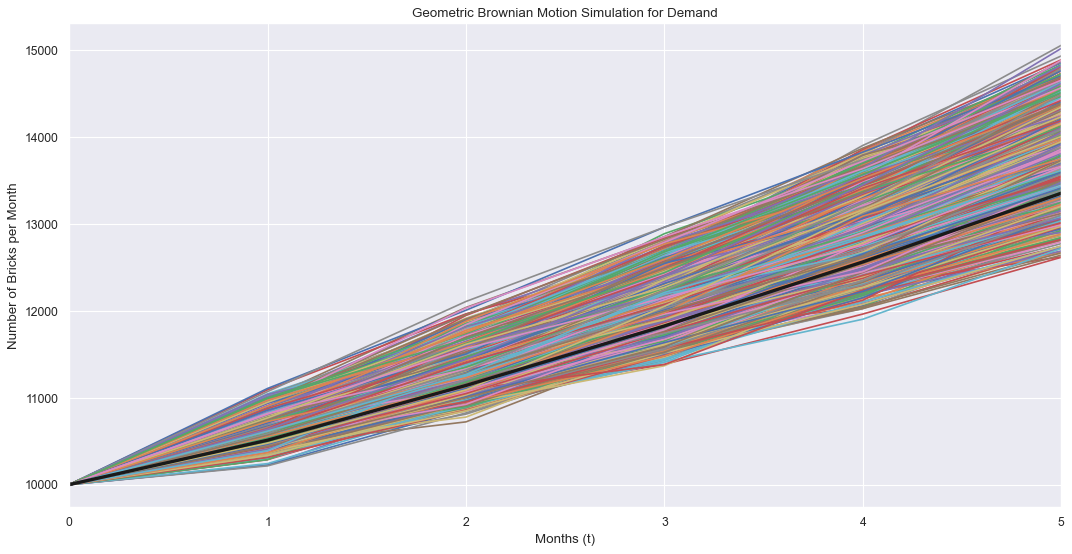

In [434]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")

plt.plot(demand)
#plt.plot(pop_trend, c ='k', linewidth=3.0)
plt.plot(production_cap, c ='k', linewidth=3.0)
#plt.plot(prod_trend, c ='k', linewidth=3.0, linestyle = 'dashed')
plt.xlabel("Months (t)")
plt.ylabel("Number of Bricks per Month")
plt.title("Geometric Brownian Motion Simulation for Demand")
plt.xlim([0, n])
plt.show

In [418]:
demand_df =pd.DataFrame(demand.T)

In [429]:
pers = [0.01, 0.52, 1.0, 2.5, 5.0, 10]
var1 = scs.scoreatpercentile(demand_df[1], pers)
var2 = scs.scoreatpercentile(demand_df[2], pers)
var3 = scs.scoreatpercentile(demand_df[3], pers)
var4 = scs.scoreatpercentile(demand_df[4], pers)
var5 = scs.scoreatpercentile(demand_df[5], pers)
var_df = pd.DataFrame({'Percentile' : pers, 'Year 1' : var1, 'Year 2' : var2, 'Year 3' : var3, 'Year 4' : var4, 'Year 5' : var5})

In [430]:
var_df

,Percentile,Year 1,Year 2,Year 3,Year 4,Year 5
0,0.01,10223.034836,10777.458550,11382.366050,11963.517113,12621.172225
1,0.52,10368.002374,10935.440694,11537.671339,12225.237211,12934.601719
2,1.00,10392.306789,10966.303428,11590.389799,12277.756679,13015.977321
3,2.50,10435.116501,11023.884362,11670.744156,12375.222469,13121.740820
4,5.00,10467.809134,11081.728294,11744.579075,12469.734943,13229.491662
5,10.00,10511.401946,11141.796653,11826.509148,12563.455807,13354.036651


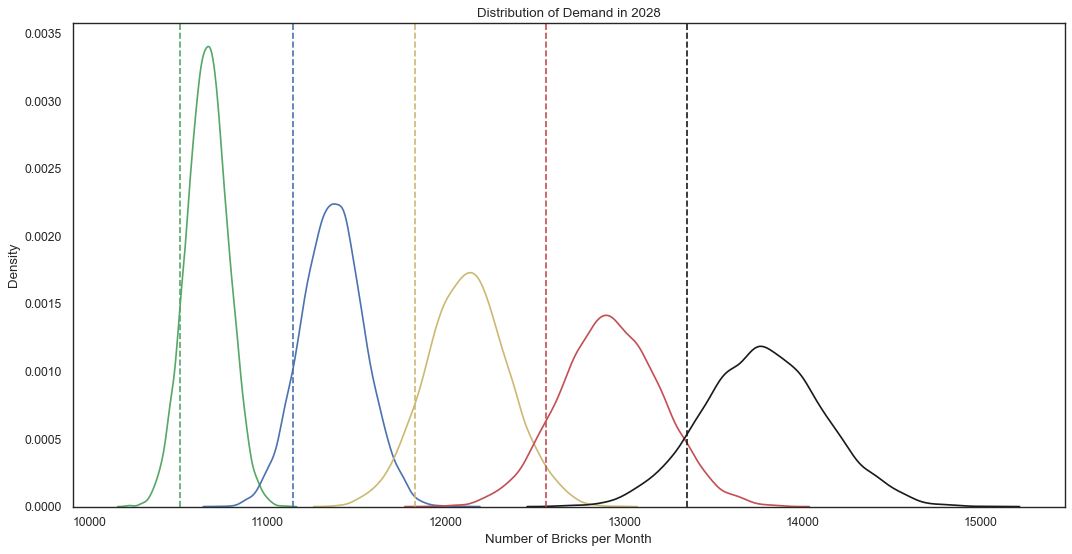

In [436]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="white")
sns.kdeplot(demand_df[1], c = 'g')
sns.kdeplot(demand_df[2], c = 'b')
sns.kdeplot(demand_df[3], c = 'y')
sns.kdeplot(demand_df[4], c = 'r')
sns.kdeplot(demand_df[5], c = 'k')
plt.title("Distribution of Demand in 2028")
plt.xlabel("Number of Bricks per Month")

color = ['w','g','b','y','r','k']
months = [1,2,3,4,5]
for i in range(6):
    plt.axvline(production_cap[i], c=color[i], linestyle = 'dashed')

plt.show()

In [437]:
print("The most probable demand in 2028 is:\n" + str(demand_df[5].median()))

The most probable demand in 2028 is:
13778.803773360214


In [438]:
plastic_trend[5]

26806.273325455677

##### SImulating Total Polyethylene Waste Recycled

### $$ Recycled_t  = \sum_{x = 0}^{t}S_t * P $$
S = Units sold\
P = Plastic(kg) per unit

##### Bayesian Optimisation Minimal Amount of Plastic per Brick to Achieve Benchmark

In [463]:
benchmark = 15000
risk = 10

In [464]:
def recycle_eval(P):
    R = (demand*P)
    recycled_df =pd.DataFrame(R.T)
    
    z = scs.percentileofscore(recycled_df[5], benchmark)
    z = abs(risk-z)
    return -z

In [465]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

recycle_bo = BayesianOptimization(recycle_eval, {'P' : (0.5, 1.5)})
                              
# init_points=20, n_iter=100 for final pred
recycle_bo.maximize(init_points=20, n_iter=100, acq='ei')

|   iter    |  target   |     P     |
-------------------------------------
|  1        | -10.0     |  1.464    |
|  2        | -10.0     |  1.356    |
|  3        | -90.0     |  0.7129   |
|  4        | -10.0     |  1.21     |
|  5        | -10.0     |  1.223    |
|  6        | -90.0     |  0.8435   |
|  7        | -90.0     |  0.612    |
|  8        | -90.0     |  0.5829   |
|  9        | -90.0     |  0.5927   |
|  10       | -9.79     |  1.169    |
|  11       | -10.0     |  1.364    |
|  12       | -90.0     |  0.9856   |
|  13       | -10.0     |  1.369    |
|  14       | -10.0     |  1.457    |
|  15       | -90.0     |  0.8222   |
|  16       | -90.0     |  0.9118   |
|  17       | -10.0     |  1.299    |
|  18       | -90.0     |  0.6122   |
|  19       | -10.0     |  1.27     |
|  20       | -10.0     |  1.417    |
|  21       | -10.0     |  1.5      |
|  22       | -9.93     |  1.181    |
|  23       | -10.0     |  1.326    |
|  24       | -10.0     |  1.395    |
|  25       

In [466]:
print("Minimum Polyethylene Composition: ", recycle_bo.max, " kg")

Minimum Polyethylene Composition:  {'target': -0.009999999999999787, 'params': {'P': 1.1232527554957148}}  kg


In [467]:
plastic = 1.1232527554957148

In [468]:
R = demand*plastic

<function matplotlib.pyplot.show(close=None, block=None)>

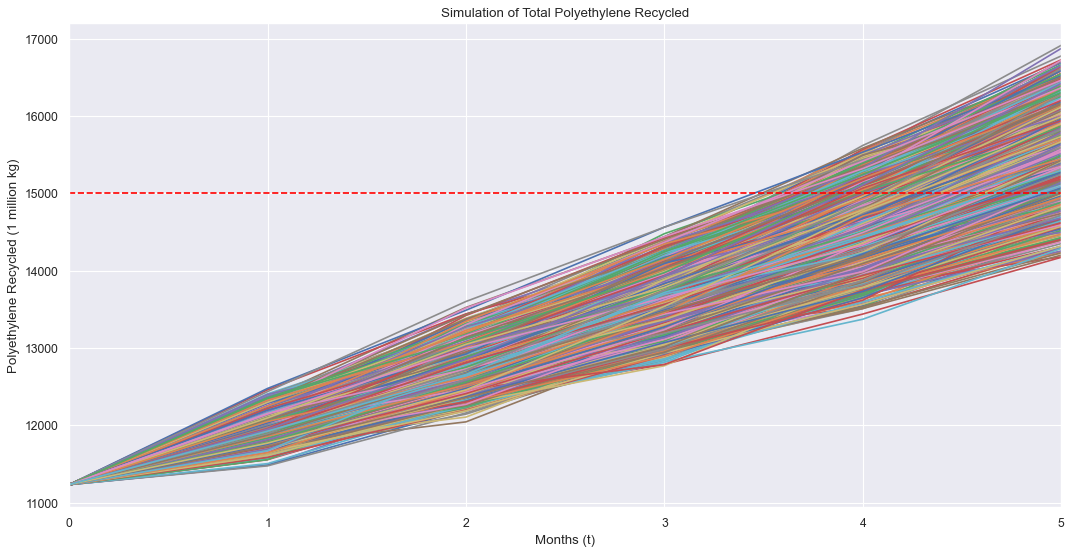

In [471]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")

plt.plot(R)
plt.xlabel("Months (t)")
plt.ylabel("Polyethylene Recycled (1 million kg)")
plt.title("Simulation of Total Polyethylene Recycled")
plt.xlim([0, n])
#plt.plot(production, c ='k', linewidth=3.0, linestyle = 'dashed')
#plt.axhline(production[60], c='red', linestyle = 'dashed')
plt.axhline(benchmark, c='red', linestyle = 'dashed')
plt.show

In [472]:
recycled_df =pd.DataFrame(R.T)

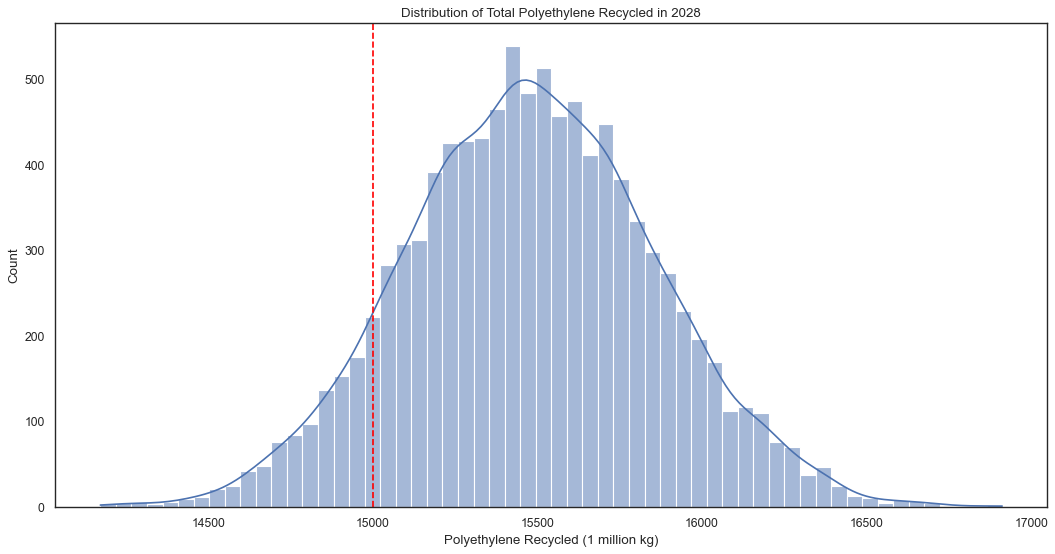

In [473]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="white")
sns.histplot(recycled_df[5], kde=True)
plt.title("Distribution of Total Polyethylene Recycled in 2028")
plt.xlabel("Polyethylene Recycled (1 million kg)")
plt.axvline(benchmark, c='red', linestyle = 'dashed')
plt.show()

In [474]:
prob = scs.percentileofscore(recycled_df[5], benchmark)

In [475]:
print("The probability of recycling above benchmark is:")
print(str(100-prob) + "%")

The probability of recycling above benchmark is:
89.99%
